# ESERCITAZIONE MATPLOTLIB
Esercizi non riusciti:
*   Es.12


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


Es.1

In [35]:
df['area'].count()


5283

Es.2

In [37]:
Regione=input()
df.loc[df['nome_area']==Regione,'area'].count()

Lombardia


264

Es.3

In [38]:
Regione=input()
if df.loc[df['nome_area']==Regione,'area'].count() >= 1:
  print(df.loc[df['nome_area']==Regione,'area'].count())
else:
 print('Region not avaible')

Calabria
174


Es.4

In [39]:
Regione=input('Inserire nome regione:')
df.loc[df['nome_area']==Regione,'numero_dosi'].count()

Inserire nome regione:Liguria


244

Es.5

In [40]:
df.groupby('fornitore')['numero_dosi'].sum() 

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

Es.6

In [41]:
Regione=input('Scegliere la regione desiderata:')
data=df.groupby(['nome_area','fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
data[data['nome_area']==Regione]

Scegliere la regione desiderata:Basilicata


,nome_area,fornitore,numero_dosi,codice_regione_ISTAT
6,Basilicata,Pfizer/BioNTech,660765,935
5,Basilicata,Moderna,138900,493
7,Basilicata,Vaxzevria (AstraZeneca),117600,340
4,Basilicata,Janssen,19400,187


Es.7

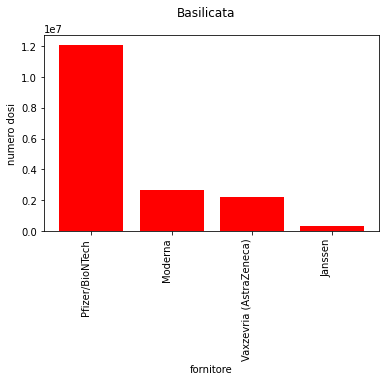

In [42]:
fig = plt.figure()              
ax = plt.axes()     

ax.bar(data['fornitore'],data['numero_dosi'],color='Red')
fig.autofmt_xdate(rotation=90)


ax.set_xlabel('fornitore')
ax.set_ylabel('numero dosi')

fig.suptitle(Regione)
plt.show()

Es.8

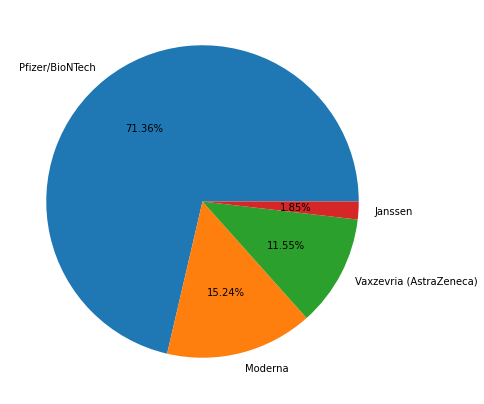

In [43]:
data=df.groupby(['fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)

fig = plt.figure(figsize=[7,9])

ax = plt.axes()
ax.pie(data['numero_dosi'], labels=data['fornitore'], autopct='%1.2f%%')

plt.show()

Es.9

<function matplotlib.pyplot.show>

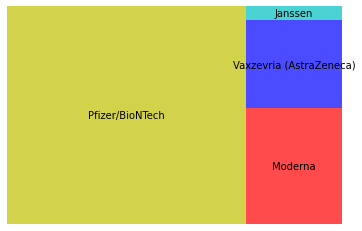

In [44]:
!pip install squarify
import squarify

color_list=['y','r','b','c','w','r']
plt.rc('font',size=10)
squarify.plot(sizes=data['numero_dosi'],label=data['fornitore'],color=color_list,alpha=0.7)
plt.axis('off')

plt.show

Es.10

In [45]:
df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum }).sort_values('numero_dosi',ascending=False).head(3) 

,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332809
3,Campania,9179718


Es.11

In [46]:
data=df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum })
data.loc[data['numero_dosi'] < data['numero_dosi'].mean(),['nome_area']]

,nome_area
0,Abruzzo
1,Basilicata
2,Calabria
5,Friuli-Venezia Giulia
7,Liguria
9,Marche
10,Molise
12,Provincia Autonoma Bolzano / Bozen
13,Provincia Autonoma Trento
15,Sardegna


Es.12

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


Text(0.5, 0.98, 'Numero dosi per le Regioni')

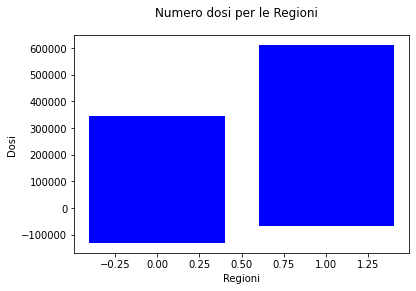

In [47]:
LomLaz= (df['nome_area'].str.contains('Lombardia'))+(df['nome_area'].str.contains('Lazio'))
fig = plt.figure()
ax = plt.axes()
ax.bar(LomLaz, df['numero_dosi'], color='b')

ax.set_xlabel('Regioni')
ax.set_ylabel('Dosi')
fig.suptitle('Numero dosi per le Regioni')